In [1]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers


In [2]:
driver_details = pd.read_csv('data/driver_imgs_list.csv',na_values='na')
print(driver_details.head(5))

  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


In [3]:
driv_selected = ['p050', 'p015', 'p022', 'p056']

In [4]:
## Getting all the images

val_image = []
image_label = []


for i in range(10):
    print('now we are in the folder C',i)
    imgs = os.listdir("data/imgs/train/c"+str(i))
    for j in range(len(imgs)):
        img_name = "data/imgs/train/c"+str(i)+"/"+imgs[j]
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        label = i
        driver = driver_details[driver_details['img'] == imgs[j]]['subject'].values[0]
        if driver in driv_selected:
            val_image.append([img,label,driver])
            image_label.append(i)



now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2


KeyboardInterrupt: 

In [ ]:
## Randomly shuffling the images

import random
random.shuffle(val_image)

In [ ]:
## Splitting the train and test

X_test = []
y_test = []
D_test = []
true_test = []

for features,labels,drivers in val_image:
    X_test.append(features)
    y_test.append(labels)
    D_test.append(drivers)
    true_test.append(labels)
    

print (len(X_test),len(y_test))

3692 3692


In [ ]:
## Converting images to nparray. Encoding the Y

X_test = np.array(X_test).reshape(-1,224,224,3)
y_test = to_categorical(y_test)


print (X_test.shape)

(3692, 224, 224, 3)


### KNN on the Validation Images

In [ ]:
## Defining the input

from keras.layers import Input
vgg16_input = Input(shape = (224, 224, 3), name = 'Image_input')


## The VGG model

from keras.applications.vgg16 import VGG16, preprocess_input

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False, input_tensor = vgg16_input)
#model_vgg16_conv.summary()
print('Model Loaded')

Model Loaded


In [ ]:
vgg16_features_output=model_vgg16_conv.predict(X_test)
vgg16_features_output.shape

(3692, 7, 7, 512)

In [ ]:
knn_input=np.reshape(vgg16_features_output,(3692,-1))

In [ ]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=30).fit(knn_input)
print("Done")

Done


In [ ]:
distances, indices = nbrs.kneighbors(knn_input)

In [ ]:
indices[0]

array([   0,   31,  849, 1191,  301, 2728, 2347,  129, 1107, 3080, 1791,
       2343, 2467,  591, 3362, 3428, 3652, 1577, 1572,  988, 3574,  291,
       3038,  500, 1735,  168, 2978, 2344, 1375,  401], dtype=int64)

In [ ]:
map_class = {0:'c1',1:'c7',2:'c8',3:'c0',4:'c3',5:'c9',6:'c0',7:'c2',8:'c0',9:'c1'}

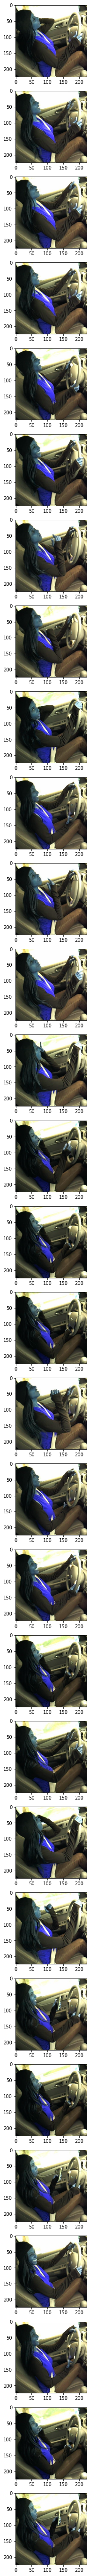

In [ ]:
fig, ax = plt.subplots(30, 1, figsize = (100,100))

img = 0

for i in indices[2]:  
    ax[img].imshow(X_test[i])
    plt.show
    img = img+1
    

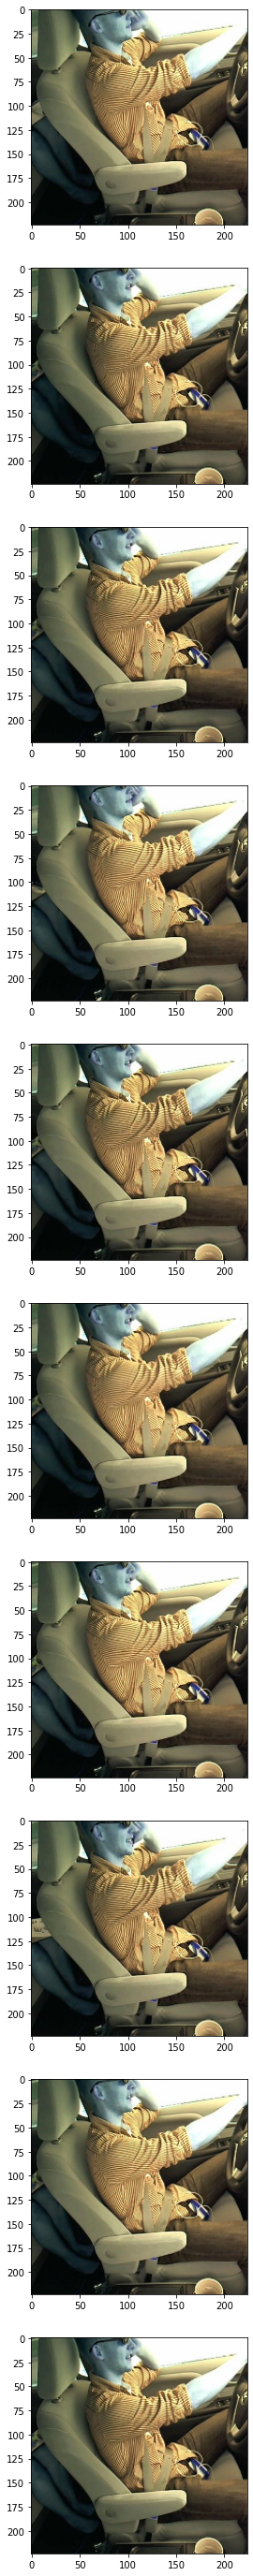

In [ ]:
fig, ax = plt.subplots(10, 1, figsize = (50,50))

img = 0

for i in indices[10]:  
    ax[img].imshow(X_test[i])
    plt.show
    img = img+1
    